In [25]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
file_path = 'cure_tsr_metrics_samples_unreal.txt'
data = pd.read_csv(file_path, delim_whitespace=True)
data.head(5)

,image,psnr_noisy,psnr_denoised,ssim_noisy,ssim_denoised,unique_noisy,unique_denoised,ms_unique_noisy,ms_unique_denoised,csv_noisy,csv_denoised,summer_noisy,summer_denoised
0,/home/olives/Desktop/ECE6258_Project/Datasets/...,35.371551,18.254349,0.987714,0.817068,1.0,1.0,1.0,1.0,0.990786,0.963406,4.911508,4.735951
1,/home/olives/Desktop/ECE6258_Project/Datasets/...,19.614653,15.824931,0.568709,0.451235,1.0,1.0,1.0,1.0,0.966142,0.942839,4.763246,4.674378
2,/home/olives/Desktop/ECE6258_Project/Datasets/...,18.162526,15.164906,0.322840,0.267452,1.0,1.0,1.0,1.0,0.963939,0.936645,4.035760,4.560092
3,/home/olives/Desktop/ECE6258_Project/Datasets/...,19.170319,16.773510,0.574132,0.521023,1.0,1.0,1.0,1.0,0.974976,0.949661,4.755194,4.915158
4,/home/olives/Desktop/ECE6258_Project/Datasets/...,18.285898,15.158519,0.357775,0.340714,1.0,1.0,1.0,1.0,0.957587,0.940650,4.832818,4.544787


In [27]:
file_path = 'cure_tsr_metrics_nn_unreal.txt'
data2 = pd.read_csv(file_path, delim_whitespace=True)
data2.head(5)

,image,psnr_noisy,psnr_denoised,ssim_noisy,ssim_denoised,unique_noisy,unique_denoised,ms_unique_noisy,ms_unique_denoised,csv_noisy,csv_denoised,summer_noisy,summer_denoised
0,E:\CURE-TSR\Unreal_Test\CodecError-1\02_01_03_...,35.371551,18.203767,0.987714,0.590332,1.0,1.0,1.0,1.0,0.990786,0.967968,4.911508,4.802949
1,E:\CURE-TSR\Unreal_Test\CodecError-1\02_01_03_...,19.614653,10.210583,0.568709,0.394052,1.0,1.0,1.0,1.0,0.966142,0.946876,4.763246,4.975290
2,E:\CURE-TSR\Unreal_Test\CodecError-1\02_01_03_...,18.162526,11.406252,0.322840,0.345824,1.0,1.0,1.0,1.0,0.963939,0.941332,4.035760,4.954664
3,E:\CURE-TSR\Unreal_Test\CodecError-1\02_01_03_...,19.170319,9.050955,0.574132,0.330914,1.0,1.0,1.0,1.0,0.974976,0.937770,4.755194,4.992789
4,E:\CURE-TSR\Unreal_Test\CodecError-1\02_01_03_...,18.285898,12.314507,0.357775,0.408739,1.0,1.0,1.0,1.0,0.957587,0.936692,4.832818,4.969805


C:\Users\efeoz\AppData\Local\Temp\ipykernel_21480\1185339118.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages = data.groupby('group').mean()
C:\Users\efeoz\AppData\Local\Temp\ipykernel_21480\1185339118.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages2 = data2.groupby('group').mean()


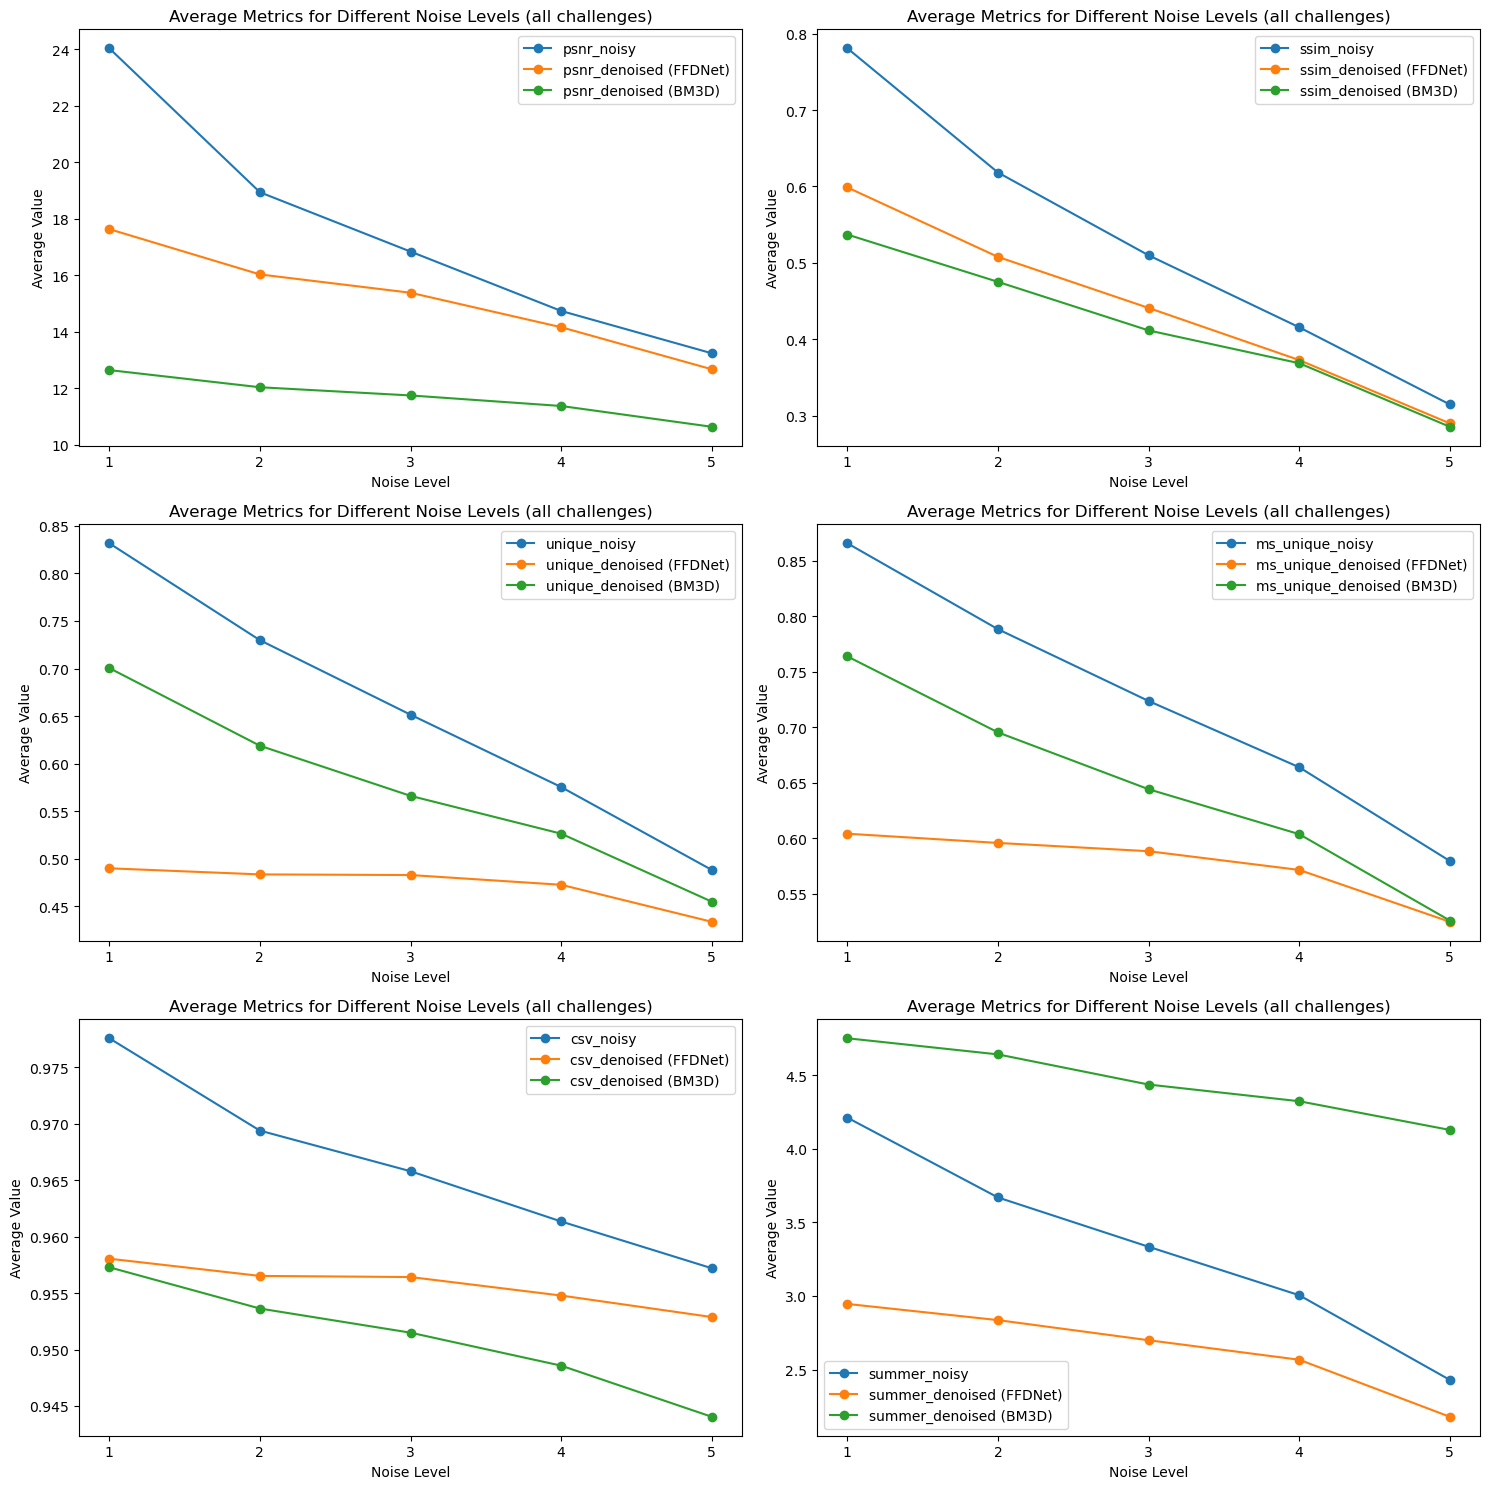

In [28]:
data['group'] = data['image'].str[-11:-9]
data['group'] = pd.to_numeric(data['group'], errors='coerce')
class_averages = data.groupby('group').mean()

data2['group'] = data2['image'].str[-11:-9]
data2['group'] = pd.to_numeric(data2['group'], errors='coerce')
class_averages2 = data2.groupby('group').mean()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over pairs of consecutive columns
for i in range(0, len(class_averages.columns) - 1, 2):
    ax = axes[i // 2]

    ax.plot(class_averages.index, class_averages.iloc[:, i], marker='o', label=class_averages.columns[i])
    ax.plot(class_averages.index, class_averages.iloc[:, i + 1], marker='o', label=class_averages.columns[i + 1] + ' (FFDNet)')
    ax.plot(class_averages2.index, class_averages2.iloc[:, i + 1], marker='o', label=class_averages2.columns[i + 1] + ' (BM3D)')

    ax.set_title(f'Average Metrics for Different Noise Levels (all challenges)')
    ax.set_xlabel('Noise Level')
    ax.set_ylabel('Average Value')
    ax.set_xticks(class_averages.index)
    ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.savefig("cure_tsr_combined_plots\\Average_Metrics_for_Different_Noise_Levels_all_challenges.png")

plt.show()

C:\Users\efeoz\AppData\Local\Temp\ipykernel_21480\1856782361.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages = data.groupby('group').mean()
C:\Users\efeoz\AppData\Local\Temp\ipykernel_21480\1856782361.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages2 = data2.groupby('group').mean()


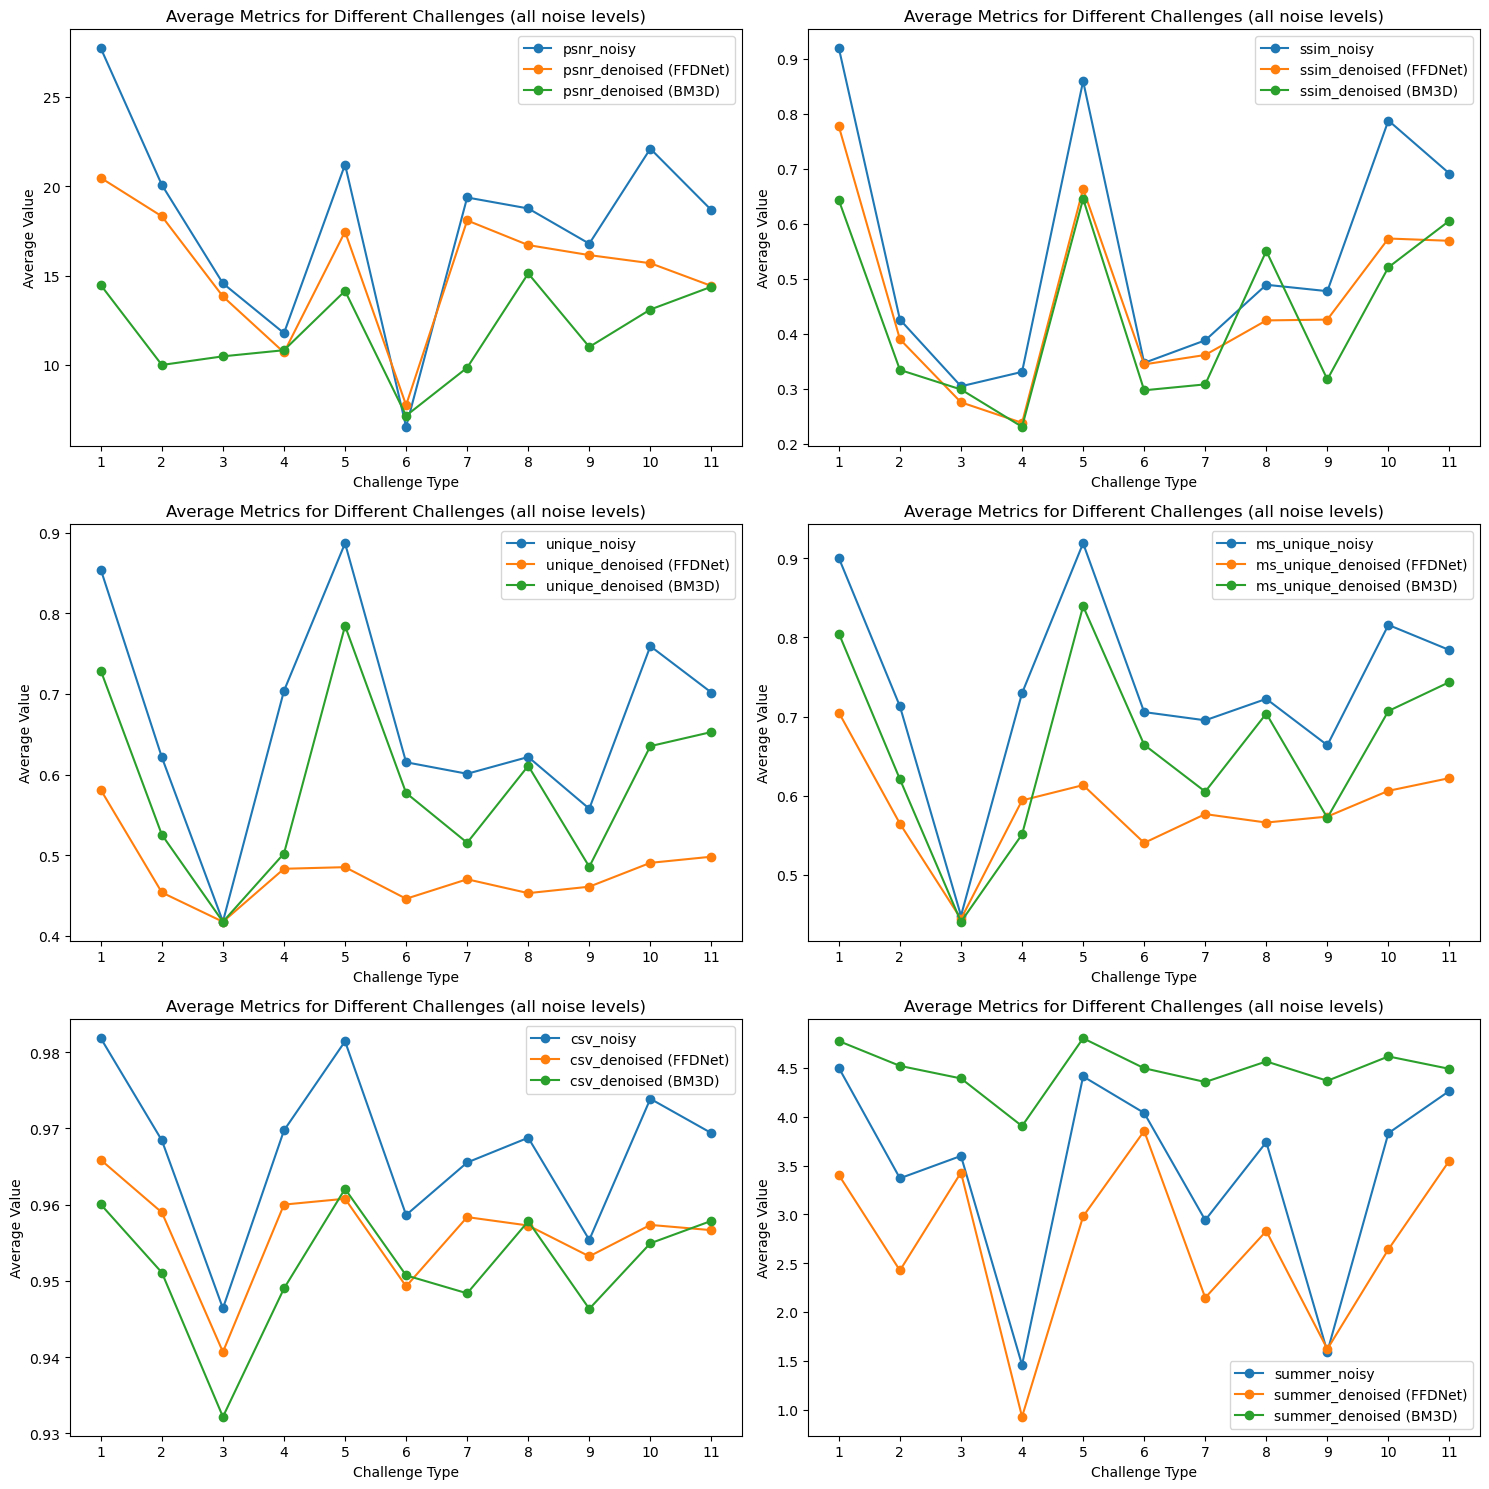

In [29]:
data['group'] = data['image'].str[-14:-12]
data['group'] = pd.to_numeric(data['group'], errors='coerce')
class_averages = data.groupby('group').mean()

data2['group'] = data2['image'].str[-14:-12]
data2['group'] = pd.to_numeric(data2['group'], errors='coerce')
class_averages2 = data2.groupby('group').mean()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over pairs of consecutive columns
for i in range(0, len(class_averages.columns) - 1, 2):
    ax = axes[i // 2]

    ax.plot(class_averages.index, class_averages.iloc[:, i], marker='o', label=class_averages.columns[i])
    ax.plot(class_averages.index, class_averages.iloc[:, i + 1], marker='o', label=class_averages.columns[i + 1] + ' (FFDNet)')
    ax.plot(class_averages2.index, class_averages2.iloc[:, i + 1], marker='o', label=class_averages2.columns[i + 1] + ' (BM3D)')

    ax.set_title(f'Average Metrics for Different Challenges (all noise levels)')
    ax.set_xlabel('Challenge Type')
    ax.set_ylabel('Average Value')
    ax.set_xticks(class_averages.index)
    ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.savefig("cure_tsr_combined_plots\\Average_Metrics_for_Different_challenges_all_noise_levels.png")

plt.show()

C:\Users\efeoz\AppData\Local\Temp\ipykernel_12780\2876924264.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages = data.groupby('group').mean()


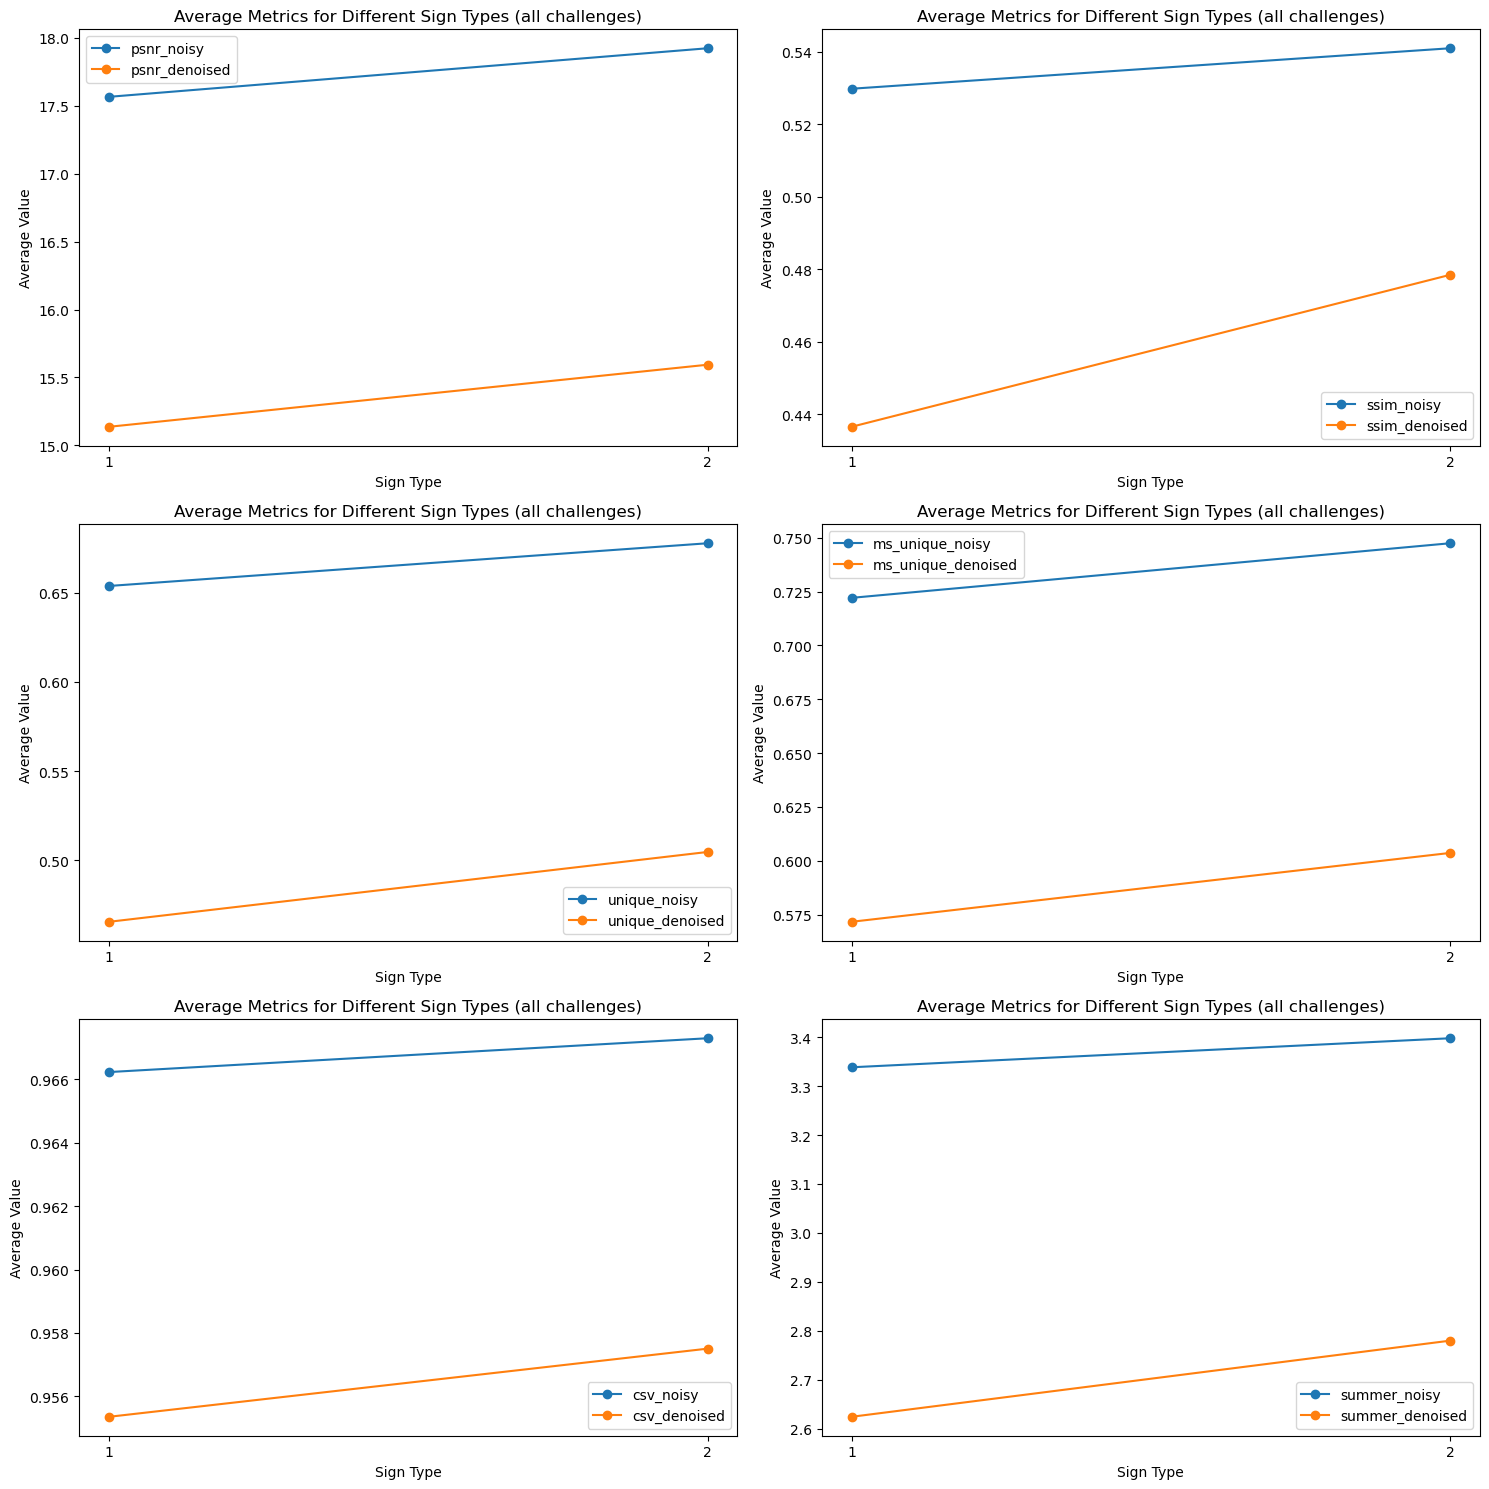

In [24]:
data['group'] = data['image'].str[-17:-15]
data['group'] = pd.to_numeric(data['group'], errors='coerce')
class_averages = data.groupby('group').mean()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over pairs of consecutive columns
for i in range(0, len(class_averages.columns) - 1, 2):
    ax = axes[i // 2]

    ax.plot(class_averages.index, class_averages.iloc[:, i], marker='o', label=class_averages.columns[i])
    ax.plot(class_averages.index, class_averages.iloc[:, i + 1], marker='o', label=class_averages.columns[i + 1])

    ax.set_title(f'Average Metrics for Different Sign Types (all challenges)')
    ax.set_xlabel('Sign Type')
    ax.set_ylabel('Average Value')
    ax.set_xticks(class_averages.index)
    ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.savefig("cure_tsr_metric_plots\\Average_Metrics_for_Different_Sign_Types_all_challenges.png")

plt.show()

In [25]:
#Specific Challenge Type

C:\Users\efeoz\AppData\Local\Temp\ipykernel_21480\3600901612.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages = filtered_data.groupby('group').mean()
C:\Users\efeoz\AppData\Local\Temp\ipykernel_21480\3600901612.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_averages2 = filtered_data2.groupby('group').mean()


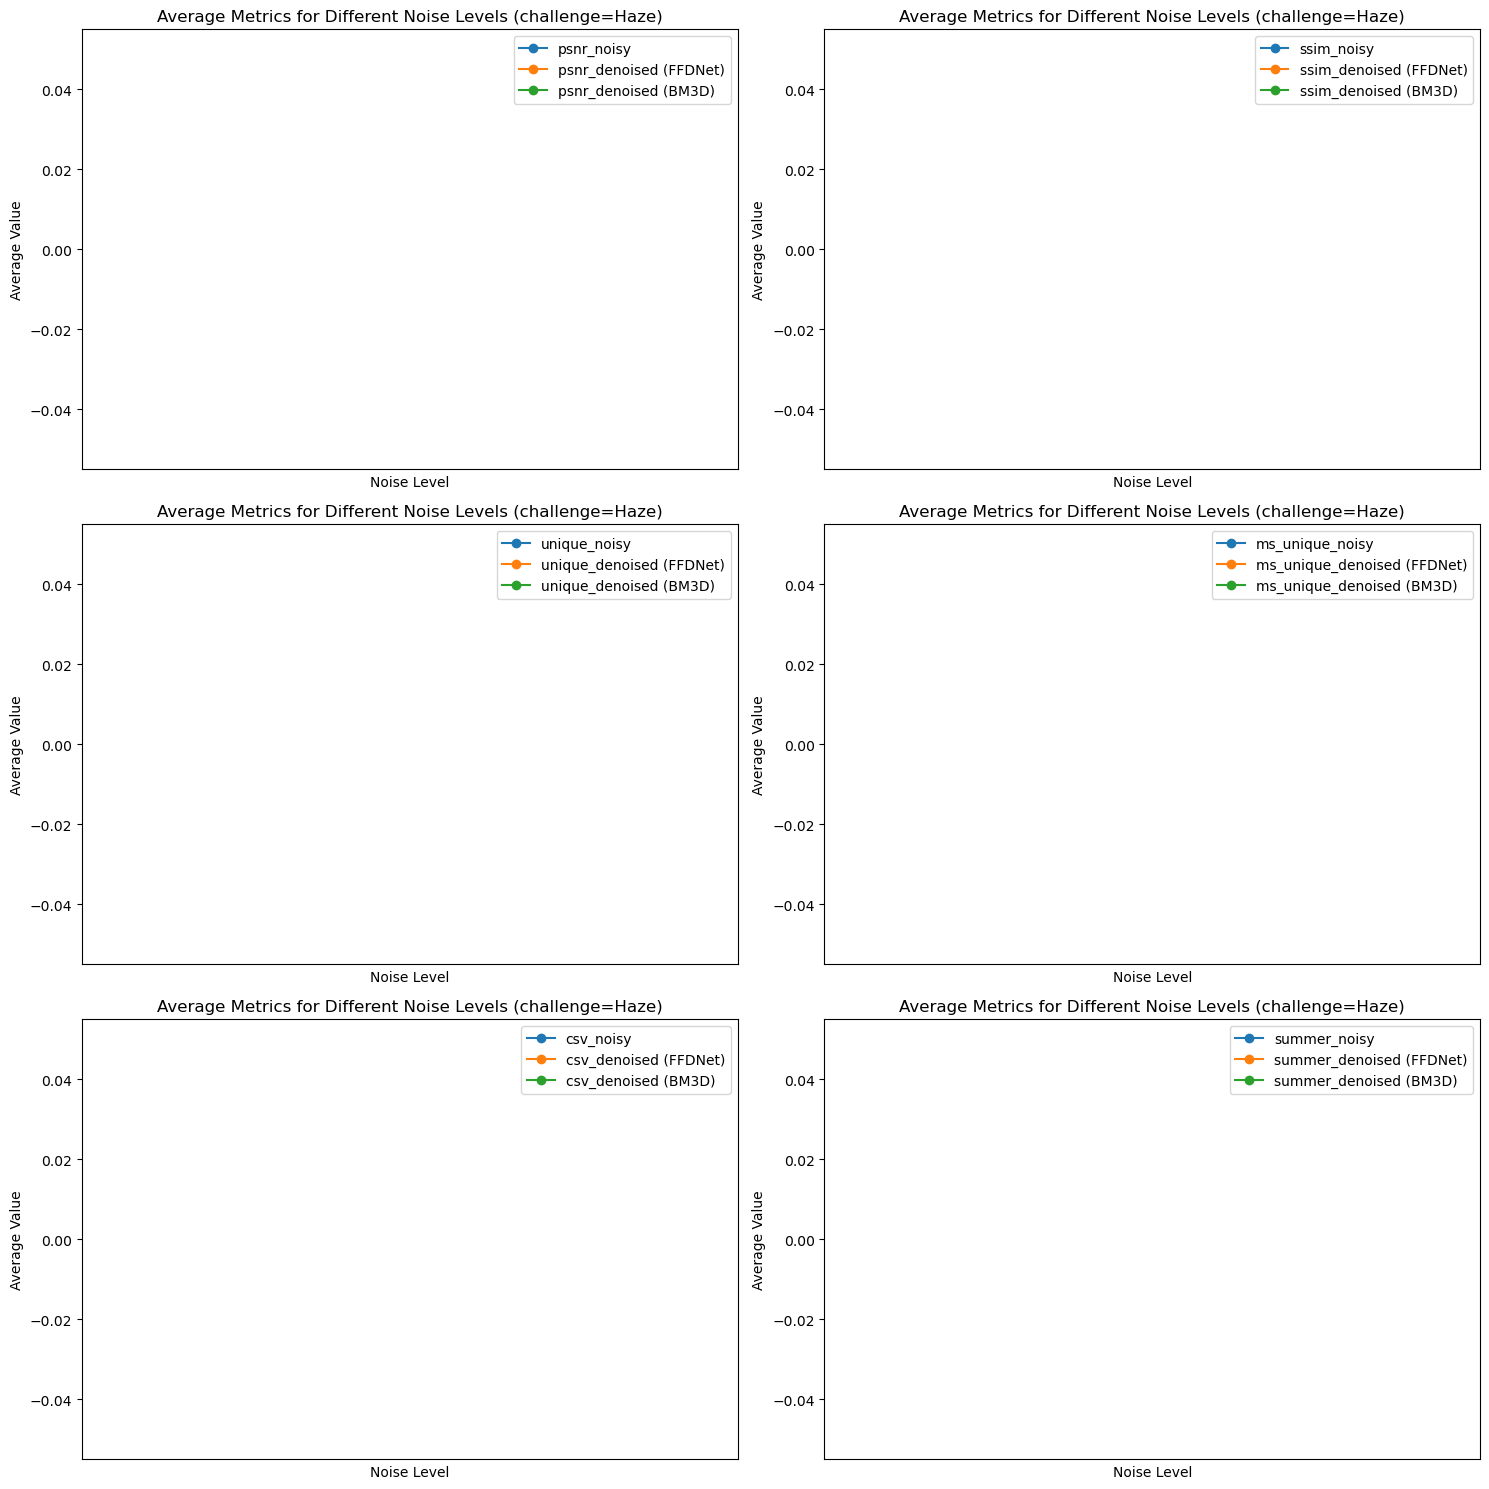

In [41]:
challenge_type = 12
challange_dict = {1: 'Decolorization', 2: 'Lens blur', 3: 'Codec error', 4: 'Darkening', 5: 'Dirty lens', 6: 'Exposure', 7: 'Gaussian blur', 8: 'Noise', 9: 'Rain', 10: 'Shadow', 11: 'Snow', 12: 'Haze'}
# Extract the challenge type based on the number in the image filename
data['challenge_type'] = data['image'].str[-14:-12]

# Filter out rows where the challenge_type extraction is successful
filtered_data = data[data['challenge_type'].notnull()]

# Convert the challenge_type to numeric
filtered_data['challenge_type'] = pd.to_numeric(filtered_data['challenge_type'], errors='coerce')

# Filter data for a specific challenge type, e.g., challenge_type = 3
filtered_data = filtered_data[filtered_data['challenge_type'] == challenge_type]

# Extract the group based on the last character before '.jpg'
filtered_data['group'] = filtered_data['image'].str[-11:-9]
filtered_data['group'] = pd.to_numeric(filtered_data['group'], errors='coerce')
class_averages = filtered_data.groupby('group').mean()

# Extract the challenge type based on the number in the image filename
data2['challenge_type'] = data2['image'].str[-14:-12]

# Filter out rows where the challenge_type extraction is successful
filtered_data2 = data2[data2['challenge_type'].notnull()]

# Convert the challenge_type to numeric
filtered_data2['challenge_type'] = pd.to_numeric(filtered_data2['challenge_type'], errors='coerce')

# Filter data for a specific challenge type, e.g., challenge_type = 3
filtered_data2 = filtered_data2[filtered_data2['challenge_type'] == challenge_type]

# Extract the group based on the last character before '.jpg'
filtered_data2['group'] = filtered_data2['image'].str[-11:-9]
filtered_data2['group'] = pd.to_numeric(filtered_data2['group'], errors='coerce')
class_averages2 = filtered_data2.groupby('group').mean()

# Calculate the number of required subplots
num_subplots = 3

# Plot figures using subplots, each with two consecutive lines
fig, axes = plt.subplots(nrows=num_subplots, ncols=2, figsize=(15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over pairs of consecutive columns
for i, ax in enumerate(axes):
    col_index = i * 2
    if col_index < len(class_averages.columns) - 1:
        ax.plot(class_averages.index, class_averages.iloc[:, col_index], marker='o', label=class_averages.columns[col_index])
        ax.plot(class_averages.index, class_averages.iloc[:, col_index + 1], marker='o', label=class_averages.columns[col_index + 1] + ' (FFDNet)')
        ax.plot(class_averages2.index, class_averages2.iloc[:, col_index + 1], marker='o', label=class_averages2.columns[col_index + 1] + ' (BM3D)')

        ax.set_title(f'Average Metrics for Different Noise Levels (challenge={challange_dict[challenge_type]})')
        ax.set_xlabel('Noise Level')
        ax.set_ylabel('Average Value')
        ax.set_xticks(class_averages.index)
        ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.savefig(f"cure_tsr_combined_plots\\Average_Metrics_for_Different_Noise_Levels_{challange_dict[challenge_type]}.png")

plt.show()